In [265]:
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import re
import time
import sys
%matplotlib inline
import seaborn as sns
from selenium import webdriver
import random

In [ ]:
reload(sys)
sys.setdefaultencoding("utf-8")
sys.getdefaultencoding()

In [19]:
df = pd.DataFrame(columns=["name","stars","price_range","review","cooking_type","address"])

In [11]:
for i in range(1,776):
    url = "https://www.viamichelin.com/web/Restaurants?geoboundaries=-59.7120972,-179.6484375:82.3088925,153.28125&page="+str(i)
    html = urllib.urlopen(url).read()
    soup = BeautifulSoup(html,"html.parser")

    for link in soup.findAll("div",{"class":"poi-item-name truncate"}):
        l = "https://www.viamichelin.com" + link.find("a").get("href")
        html = urllib.urlopen(l).read()
        soup = BeautifulSoup(html,"html.parser")

        for res in soup.findAll("section",{"class":"datasheet"}):
            name = res.find("div",{"class":"datasheet-item datasheet-name"}).renderContents()
            name = name.replace("\n","").replace("\t","")
            starred = res.find("div",{"class":"poi-item-stars"}).findChildren()
            try:
                if "star" in str(starred[0]):
                    if len(starred) > 1:
                        stars = len(starred)
                    else:
                        stars = 1
                else:
                    stars = 0
            except:
                stars = 0

            price_range = res.find("div",{"class":"datasheet-price"}).getText()
            price_range = price_range.replace("\n","").replace("\t","")
            review = res.blockquote.getText()
            review = review.replace("\n","").replace("\t","")
            
            try:
                cooking_type = res.find("div",{"class":"datasheet-cooking-type"}).renderContents()
            except:
                cooking_type="None"
                
            address =res.find("div",{"class":"poi-item-stars"}).findNextSibling().renderContents()
        
            df.loc[len(df)]=[name, stars, price_range, review, cooking_type, address]
    time.sleep(1.09)

In [73]:
df.drop_duplicates(inplace=True)
#df3.drop_duplicates(inplace=True)

In [75]:
#df.to_csv("/users/Sheena/Desktop/DSI/Michelin/assets/mlist1.csv",index=False,encoding="utf-8")
#df3.to_csv("/users/Sheena/Desktop/DSI/Michelin/assets/mlist2.csv",index=False,encoding="utf-8")

In [40]:
#mlist1 = pd.read_csv("../assets/mlist1.csv")
#mlist2 = pd.read_csv("../assets/mlist2.csv")

In [45]:
#combined = pd.concat([mlist1,mlist2])
#combined.drop_duplicates(inplace=True)

In [ ]:
df.to_csv("/users/Sheena/Desktop/DSI/Michelin/assets/combined_copy.csv",index=False,encoding="utf-8")

In [48]:
combined.to_csv("/users/Sheena/Desktop/DSI/Michelin/combined.csv",index=False,encoding="utf-8")

In [ ]:
combined= pd.read_csv("../assets/combined.csv")

In [65]:
def getAvg(x):
    price_range = [float(i) for i in re.findall(r'[1-9][0-9]*', x)]
    avg = np.mean(price_range)
    return avg

In [70]:
combined["avg"] = combined["price_range"].apply(getAvg)

In [137]:
combined["currency"] = combined["price_range"].apply(lambda x: re.search("[A-Z]{3}", x).group(0))

In [109]:
combined["cooking_type"] = combined["cooking_type"].apply(lambda x: x[8:] if x[0:7].lower()=="cuisine" else x)

In [255]:
def sleeper(y):
    x = random.random()
    x = y+x
    time.sleep(x)

In [121]:
curr = {}
driver = webdriver.Chrome('/users/Sheena/Documents/chromedriver')  # Optional argument, if not specified will search path.
driver.get('http://www.google.com/xhtml');
sleeper(3)

search_box = driver.find_element_by_name('q')
#make sure empty
for i in currencies:
    search_box.clear()
    search_box.send_keys("1%s to USD"%i)
    sleeper(1)
    search_box.submit()
    sleeper(1)
    rate = driver.find_element_by_class_name("vk_ans").text
    curr[i]=rate[:-10]
    sleeper(1)

In [131]:
def getUSD(x,y):
    for key,val in curr.iteritems():
        if x==key:
            return float(val)*y
        elif x=="USD":
            return y

In [133]:
combined["usd_avg"] = np.vectorize(getUSD)(combined['currency'], combined['avg'])

In [140]:
combined.drop(["price_range","avg","currency"],axis=1,inplace=True)

In [141]:
combined.to_csv("/users/Sheena/Desktop/DSI/Michelin/combined_clean.csv",index=False,encoding="utf-8")

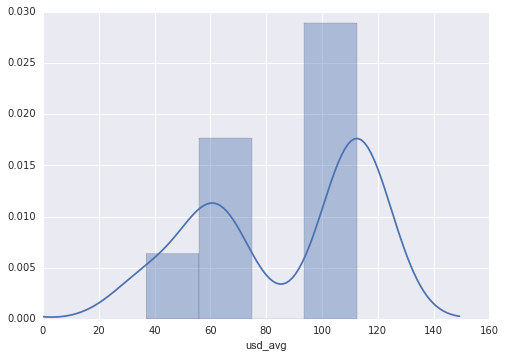

In [179]:
sns.distplot(combined[((combined.address.str.contains("New York"))|(combined.address.str.contains("Chicago"))|
          (combined.address.str.contains("San Francisco"))
         )&(combined.stars != 0.0)].usd_avg)

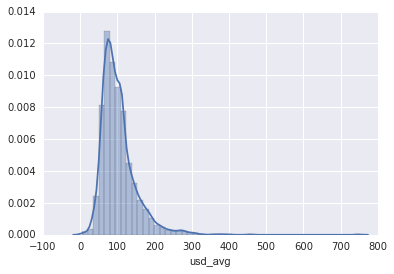

In [811]:
sns.distplot(combined[(combined.stars != 0.0)].usd_avg)

In [194]:
cuisine_stars = pd.DataFrame(combined[(combined["address"].str.contains("New York")) & (combined.stars!=0.0)].groupby("cooking_type").usd_avg.min())

In [200]:
pd.concat([cuisine_all, cuisine_stars],axis=1)

,usd_avg,usd_avg
American,18.5,37.0
Argentinian,37.0,NaN
Asian,37.0,NaN
Austrian,37.0,62.0
Barbecue,18.5,NaN
Belgian,37.0,NaN
Burmese,18.5,NaN
Chinese,18.5,37.0
Contemporary,18.5,62.0
Deli,18.5,NaN


In [256]:
def findCountry(x):
    if re.search("[9]{1}[0-9]{4}",x[-5:]):
        return "CA"
    elif re.search("[1]{1}[0-9]{4}",x[-5:]):
        return "NY"
    elif re.search("[6]{1}[0-9]{4}",x[-5:]):
        return "IL"
    else:
        return "NA"

In [253]:
combined["State"] = combined["address"].apply(findCountry)

In [483]:
ny = combined[combined["State"]=="NY"]
ny = ny.reset_index(drop=True)

In [ ]:
ca = combined[(combined["State"]=="CA")]
ca = ca.reset_index(drop=True)

In [460]:
ny_goog = pd.DataFrame(columns=["name","rev","price"])

In [480]:
#do this for all cities in the US
driver = webdriver.Chrome('/users/Sheena/Documents/chromedriver')  # Optional argument, if not specified will search path.
driver.get('http://www.google.com/xhtml');
sleeper(3.13)

search_box = driver.find_element_by_name('q')
#make sure empty
for x in ny["name"].values.tolist():
    search_box.clear()
    sleeper(0.45)
    try:
        search_box.send_keys(x.decode("utf-8"))
        sleeper(1.37)
        search_box.send_keys(" restaurant new york")
        sleeper(1.04)
        search_box.submit()
    except:
        search_box.send_keys(x.decode("ascii"))
        sleeper(1.37)
        search_box.send_keys(" restaurant new york")
        sleeper(1.32)
        search_box.submit()
    sleeper(3.25)
    try:
        rev = driver.find_element_by_class_name("_A8k").text
    except:
        rev="None"

    try:
        price = driver.find_element_by_class_name("_mr").text
    except:
        price="None"
    sleeper(2.99)

    ny_goog.loc[len(ny_goog)] = [x, rev, price]

In [508]:
def checkName(x):
    x = str(x).replace("\n", "")
    if x[-17:].lower()=='websitedirections':
        return x[:-17]
    else:
        return x

In [449]:
ca_merge.to_csv("cali_merged.csv",index=False,encoding="utf-8")

In [482]:
ny_goog.to_csv("ny_goog.csv",index=False,encoding="utf-8")

In [491]:
ny_goog = pd.read_csv("ny_goog.csv")

In [510]:
ny_goog.name = ny_goog.name.apply(checkName)
#drop duplicates
ny_goog.drop_duplicates(inplace=True)

In [515]:
#remove those that errored out
ny_goog = ny_goog[ny_goog.name!="None"].copy(deep=True)
ny_goog.dropna(inplace=True)

In [525]:
#separate rev 
ny_goog["rating"] = ny_goog["rev"].apply(lambda x: x.split("\n")[0])

In [526]:
for x,y in zip(ny_goog["name"].values.tolist(), ny_goog["rev"].values.tolist()):
    if type(y) != str:
        print x

In [531]:
ny_goog["price"].apply(lambda x: x.split(" · ")[0])

0        $$
1      $$$$
2        $$
3        $$
4        $$
5       $$$
6        $$
8        $$
9       $$$
10       $$
11      $$$
12     $$$$
13      $$$
14     $$$$
15       $$
16      $$$
17      $$$
18      $$$
19       $$
21      $$$
22       $$
23       $$
24       $$
25     $$$$
26      $$$
27       $$
28      $$$
29       $$
30      $$$
31      $$$
       ... 
526      $$
527      $$
529      $$
530      $$
531      $$
532     $$$
534      $$
535      $$
536     $$$
537      $$
538     $$$
539    $$$$
540      $$
541     $$$
542       $
543      $$
544     $$$
545     $$$
546      $$
547      $$
548      $$
549      $$
550       $
551      $$
552       $
553       $
554      $$
555      $$
556      $$
557      $$
Name: price, dtype: object

In [532]:
ch = combined[combined["State"]=="IL"]
ch = ch.reset_index(drop=True)

In [537]:
ch_goog = pd.DataFrame(columns=["name","rev","price"])

In [ ]:
#chicago time!
driver = webdriver.Chrome('/users/Sheena/Documents/chromedriver')  # Optional argument, if not specified will search path.
driver.get('http://www.google.com/xhtml');
sleeper(2.13)

search_box = driver.find_element_by_name('q')
#make sure empty
for x in ch["name"].values.tolist():
    search_box.clear()
    sleeper(1.45)
    try:
        search_box.send_keys(x.decode("utf-8"))
        sleeper(0.37)
        search_box.send_keys(" restaurant Chicago")
        sleeper(1.90)
        search_box.submit()
    except:
        search_box.send_keys(x.decode("ascii"))
        sleeper(0.37)
        search_box.send_keys(" restaurant Chicago")
        sleeper(1.90)
        search_box.submit()
    sleeper(2.65)
    try:
        rev = driver.find_element_by_class_name("_A8k").text
    except:
        rev="None"

    try:
        price = driver.find_element_by_class_name("_mr").text
    except:
        price="None"
    sleeper(4.0)

    ch_goog.loc[len(ch_goog)] = [x, rev, price]

In [557]:
ca_goog.to_csv("ca_goog.csv",index=False,encoding="utf-8")

In [808]:
ch_goog.to_csv("ch_goog3.csv",index=False,encoding="utf-8")

In [565]:
ch_merged.to_csv("ch_merged.csv",index=False,encoding="utf-8")

In [642]:
ny_merged = ny.merge(ny_goog,how="left",on="name")

In [575]:
cali = pd.read_csv("cali_merged.csv")
cali.dropna(inplace=True)

In [588]:
cooking_count = pd.DataFrame(us.cooking_type.value_counts())

In [644]:
dc = pd.read_csv("dc_google.csv")

In [667]:
def splitRPC(x):
    if len(x.split(" "))>1:
        return " ".join(x.split(" ")[2:])
    else:
        return x

In [669]:
ch_merged["cuisine"] = ch_merged["price"].apply(splitRPC)

In [672]:
ch_merged["pr"] = ch_merged["price"].apply(lambda x: x.split(" ")[0])

In [679]:
ny_goog["cuisine"] = ny_goog["price"].apply(splitRPC)

In [680]:
ny_goog["pr"] = ny_goog["price"].apply(lambda x: x.split(" ")[0])

In [683]:
ny_g = ny_goog.drop(["rev","price"],axis=1).copy(deep=True)

In [684]:
ny_merge = ny.merge(ny_g,how="left", on="name")

In [688]:
ny_merge.dropna(inplace=True)

In [691]:
ny_merge.reset_index(drop=True,inplace=True)

In [696]:
#separate rev 
ny_merge["rating"] = ny_merge["rating"].apply(lambda x: x.split("\n")[0])

In [700]:
ch_merged["rating"] = ch_merged["rev"].apply(lambda x: x.split("\n")[0])

In [703]:
ch_merged.drop(["rev","price"],axis=1,inplace=True)

In [706]:
ca_merge.dropna(inplace=True)

In [ ]:
ca_merge = ca_merge.rename(columns = {'price':'pr'})

In [779]:
us_merged = pd.concat([ca_merge,ch_merged,ny_merge])

In [781]:
def changeToContemporary(x):
    if "New" in x:
        return "Contemporary"
    elif "Fine" in x:
        return "Contemporary"
    else:
        return x

In [782]:
us_merged["cuisine"]=us_merged.cuisine.apply(changeToContemporary)

In [783]:
def removeRes(x):
    if "Restaurant" in x:
        return x.replace("Restaurant","")
    else:
        return x

In [784]:
us_merged["cuisine"]=us_merged.cuisine.apply(removeRes)

In [785]:
us_merged["cuisine"]=us_merged["cuisine"].apply(lambda x: x.split(" ")[0])

In [748]:
cooking_types_michelin = us_merged.cooking_type.value_counts().index.tolist()

In [788]:
us_merged.reset_index(drop=True,inplace=True)

In [789]:
cuisine_missing = [x for x,y in enumerate(us_merged.cuisine.values.tolist()) if y not in cooking_types_michelin ]
# for x,y in enumerate(us_merged.cuisine.values.tolist()):
#     if y not in cooking_types_michelin:
#         print x

In [796]:
us_merged["price"] = us_merged.pr.map({"$":1,"$$":2,"$$$":3,"$$$$":4})

In [ ]:
{"Chinese":["Dim","Dim Sum","Sichuan","Taiwanese","Tea","Tea House","Mandarin"],
"Mexican":["Taco"],
 "International":["Eclectic"],
 "Latin American":["Nuevo"],
 "Japanese":["Sushi","Ramen","Yakitori"],
 "American":["Diner","Family","Hamburger","Cafe"]
}


Taco = Mexican
Hamburger = American
Diner = American, Deli
Eclectic = International
Bistro = French2, American2
Sushi = Japanese
Family = American
European = Eastern European
Bar = French, American2, Californian2,Gastropub, Seafood
Steak=Steakhouse

Nuevo = Latin American
Cafe = Californian,American
Tapas = Spanish
Northern = Italian
Soul = American
Small = Fusion
Middle = Middle Eastern
Yakitori =Japanese
Ramen = Japanese
Afghani = Afghan
Cajun = Southern
Sichuan = Chinese
Modern = Contemporary
Chicken = Fusion
Dim = Chinese
Dim Sum = Chinese
British = Gastropub
Taiwanese = Chinese
Tea = Chinese
Mandarin = Chinese
Jewish = Deli
Pub = Greek
Sandwich = Deli
#926,928,940,942,945,961,971 Japanese Malaysian
#None rating


In [806]:
us_merged.to_csv("us_merged.csv",encoding="utf-8",index=False)